In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset
df=pd.read_csv("AB_NYC_2019.csv")

In [3]:
#To show first five records
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
pd.set_option('display.max_columns',None)#to show all columns

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.shape

(48895, 16)

In [7]:
#check null values in our dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'name':"NoName"}, inplace=True)
df.fillna({'host_name':"NoName"}, inplace=True)
df.fillna({'last_review':"NotReviewed"}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

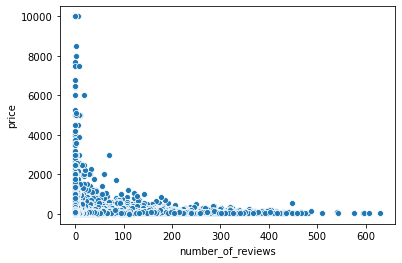

In [10]:
#we visualize scatterplot with one input Time on App  and output
#Yearly Amount Spent  
sns.scatterplot(data=df,x="number_of_reviews",y="price")
plt.show()

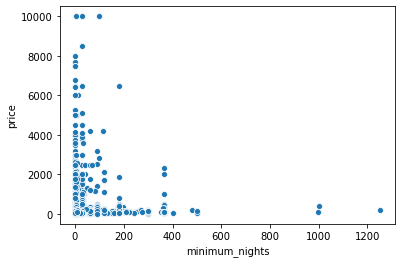

In [11]:
#we visualize scatterplot with one input Time on Website  and output
#Yearly Amount Spent  
sns.scatterplot(data=df,x="minimum_nights",y="price")
plt.show()

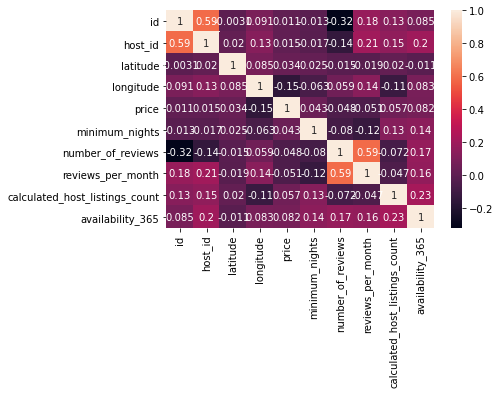

In [12]:
#check correlation between input and output with the help of corr()
#and visualize
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
# Base line Model = Linear Regression

In [14]:
df_num=df.select_dtypes(["int64","float64"])
df_cat=df.select_dtypes("object")

In [15]:
#we will separate independent and dependent variable 
#means select input and output variable from df
X=df_num.drop("price",axis=1)
Y=df_num["price"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr=LinearRegression()

In [20]:
lr.fit(X_train,Y_train)

LinearRegression()

In [21]:
#create object of LinearRegression
lr=LinearRegression()

In [22]:
#we will train data now
lr.fit(X_train,Y_train)

LinearRegression()

In [23]:
#we will test the data now
y_pred=lr.predict(X_test)

In [24]:
#Mean Squared Error Check
from sklearn.metrics import mean_squared_error

In [25]:
#mean_squared_Error
mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint
print("Mean Squared Error :",mse)

Mean Squared Error : 57055.248301461266


In [26]:
#evaluation method of LinearRegression then use R2-score inbuilt method :
from sklearn.metrics import r2_score

In [27]:
#check coefficient /slope
lr.coef_

array([-8.88455346e-09,  4.52074837e-08,  2.18210250e+02, -8.46118867e+02,
        3.41314741e-02, -2.08167777e-01, -3.63819360e+00,  5.49130758e-02,
        1.87767412e-01])

In [28]:
X.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [29]:
#check intercept 
lr.intercept_

-71322.79612063506

In [30]:
#2 assumption of Linear regression : there should be linear-relationship
#between input and output .
#here many input 
#trick , find residuals 
residuals=Y_test-y_pred
print(residuals)

18907    -30.095592
46663     67.543145
19757    -51.005481
9705      -7.186895
3322     287.801782
            ...    
12360    -66.284041
46855     18.547375
37553    -26.871687
15102    -92.724658
34586    -18.382844
Name: price, Length: 14669, dtype: float64


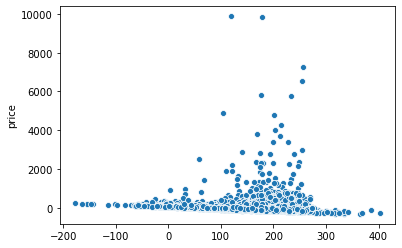

In [31]:
#relation check y_pred and residuals 
sns.scatterplot(y_pred,residuals)
plt.show()

Skewness :  19.6087474963936


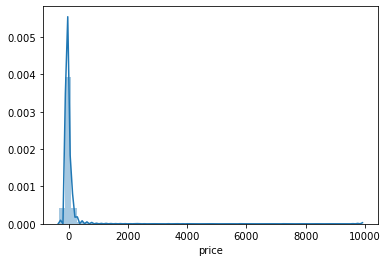

In [32]:
#3. Assumption : there should be a normal distributed curve means 
#no skewness means shold be symmetric curve
#distplot() means draw a N. D curve means frequency curve
from scipy.stats import skew
print("Skewness : ",skew(residuals))
sns.distplot(residuals)
plt.show()

In [34]:
#Feature selection : - help to select imp features 
#feature_test user defined function
#first parameter score_func : criteria=f_regression if anova test and chi2 
#if chi-2 test
#second parameter : k means how many imp features from dataset
#model : Linear regression means classification
def feature_test(criteria,count,model):
    test = SelectKBest(score_func=criteria,k=count)
    X_train_new = test.fit_transform(X_train,Y_train)
    X_test_new = test.transform(X_test)
    
    model.fit(X_train_new,Y_train) #model train 
    y_pred = model.predict(X_test_new) #model test
    #mean_squared_Error
    mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint
    print("Mean Squared Error :",mse)
    print(r2_score(Y_test,y_pred))
    print(test.get_support()) #show imp features
    #find residual
    residuals=Y_test-y_pred
    #relation check y_pred and residuals 
    sns.scatterplot(y_pred,residuals)
    plt.show()
    #check N.D curve
    from scipy.stats import skew
    print("Skewness : ",skew(residuals))
    sns.distplot(residuals)
    plt.show()
    return model

In [35]:
from sklearn.feature_selection import chi2 #chi-2 test
from sklearn.feature_selection import f_regression #ANova test
from sklearn.feature_selection import SelectKBest 

Mean Squared Error : 57362.49812831113
0.027448264446610415
[False False False  True False False False False  True]


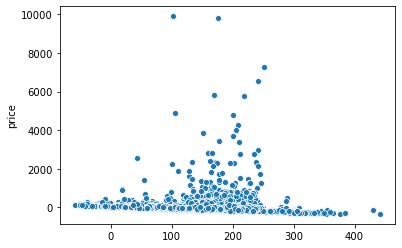

Skewness :  19.540832811696966


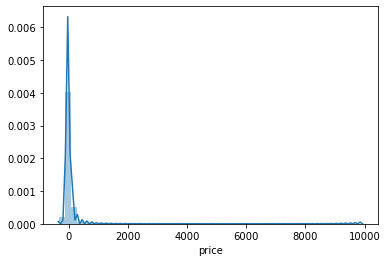

LinearRegression()

In [36]:
#Create object of LinearRegression class
lr=LinearRegression()
#call function
feature_test(f_regression,2,lr) #f_regression means =anova test and 2 : means
#no of imp features means k and lr means model train and test with Linear reg.

In [38]:
X=df[["number_of_reviews","minimum_nights"]] #input imp
cdf=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'] )
cdf

,Coeff
number_of_reviews,-845.290137
minimum_nights,0.176486
